In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
races = pd.read_csv('races.csv')
status = pd.read_csv('status.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')
drivers = pd.read_csv('drivers.csv')
circuits = pd.read_csv('circuits.csv')
lapTimes = pd.read_csv('lap_times.csv')
pitStops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
constructors = pd.read_csv('constructors.csv')
driverStandings = pd.read_csv('driver_standings.csv')
constructorResults = pd.read_csv('constructor_results.csv')
constructorStandings = pd.read_csv('constructor_standings.csv')

### Lewis Hamilton's performance over the past decade

In [4]:
drivers.head()

# Hamilton's driverId is 1

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [6]:
results.loc[results['driverId'] == 1]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
26,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1
56,57,20,1,1,22,3,13,13,13,0.0,56,\N,\N,25,19,1:35.520,203.969,11
68,69,21,1,1,22,5,3,3,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1
89,90,22,1,1,22,3,2,2,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25046,25052,1056,1,131,44,7,7,7,7,7.0,78,+1:08.231,6005051,69,1,1:12.909,164.769,1
25074,25080,1057,1,131,44,2,15,15,15,0.0,51,+17.668,8034078,43,3,1:44.769,206.270,1
25081,25087,1059,1,131,44,2,2,2,2,18.0,53,+2.904,5248674,44,5,1:37.410,215.903,1
25101,25107,1058,1,131,44,2,2,2,2,19.0,71,+35.743,4974668,71,1,1:07.058,231.811,1


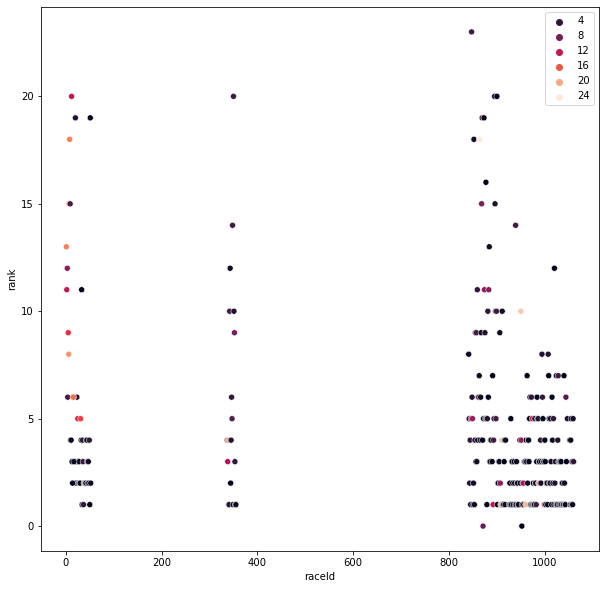

In [30]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = results.loc[results['driverId'] == 1]['raceId'], y = results.loc[results['driverId'] == 1]['rank'], hue = results.loc[results['driverId'] == 1]['grid'], palette = 'rocket')
plt.legend(loc = 'upper right')

In [41]:
# Mapping IDs from one df to another
dict(races[['raceId', 'name']].values)
results['raceName'] = results['raceId'].map(dict(races[['raceId', 'name']].values))

In [232]:
ham = results.loc[results['driverId'] == 1]

In [238]:
ham = ham.drop(ham.loc[ham['rank'] == 0].index)

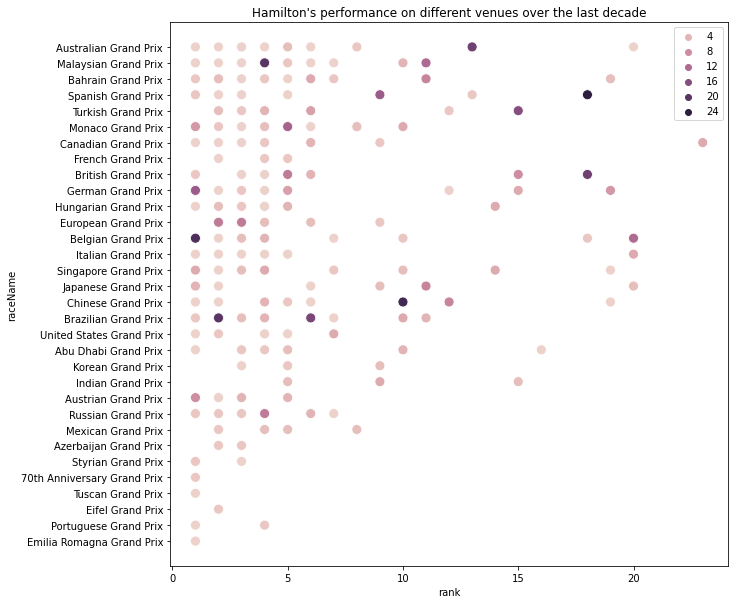

In [239]:
plt.figure(figsize = (10,10))
sns.scatterplot(y = ham['raceName'], x = ham['rank'], hue = ham['grid'], s = 100)
plt.legend(loc = 'upper right')
plt.title('Hamilton\'s performance on different venues over the last decade')
# plt.xticks(rotation = 90)
plt.show()

### Red Bull's performance in the constructor championship in 2018

In [51]:
constructors.loc[constructors['name'] == 'Red Bull']
# Their constructor id is 9

,constructorId,constructorRef,name,nationality,url
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing


In [56]:
constructorStandings['raceName'] = constructorStandings['raceId'].map(dict(races[['raceId', 'name']].values))

In [64]:
rb2018 = constructorStandings.loc[(constructorStandings['constructorId'] == 9) & (constructorStandings['raceId'] > 988) & (constructorStandings['raceId'] < 1010)]

In [65]:
rb2018

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,raceName
11898,26935,989,9,20.0,3,3,0,Australian Grand Prix
11910,26975,990,9,20.0,4,4,0,Bahrain Grand Prix
11918,26965,991,9,55.0,3,3,1,Chinese Grand Prix
11928,26985,992,9,55.0,3,3,1,Azerbaijan Grand Prix
11938,26995,993,9,80.0,3,3,1,Spanish Grand Prix
11948,27005,994,9,107.0,3,3,2,Monaco Grand Prix
11958,27015,995,9,134.0,3,3,2,Canadian Grand Prix
11968,27025,996,9,164.0,3,3,2,French Grand Prix
11978,27035,997,9,189.0,3,3,3,Austrian Grand Prix
11988,27045,998,9,199.0,3,3,3,British Grand Prix


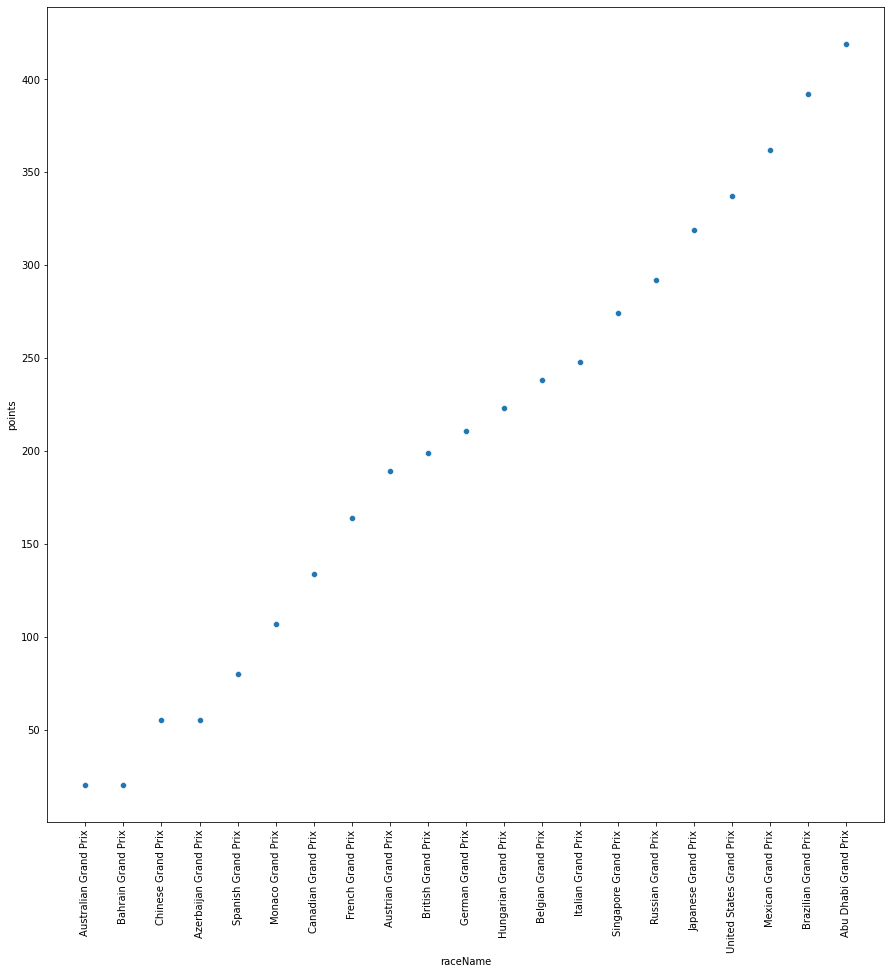

In [81]:
plt.figure(figsize = (15,15))
sns.scatterplot(data = rb2018, x = 'raceName', y = 'points')
plt.xticks(rotation = 90)
plt.show()

In [85]:
constructorResults.loc[(constructorResults['constructorId'] == 9) & (constructorResults['raceId'] > 988) & (constructorResults['raceId'] < 1010)]

,constructorResultsId,raceId,constructorId,points,status
10353,15820,1007,9,25.0,\N
11144,15642,989,9,20.0,\N
11161,15659,990,9,0.0,\N
11162,15660,991,9,35.0,\N
11181,15679,992,9,0.0,\N
11183,15681,993,9,25.0,\N
11192,15690,994,9,27.0,\N
11204,15702,995,9,27.0,\N
11213,15711,996,9,30.0,\N
11222,15720,997,9,25.0,\N


<AxesSubplot:xlabel='raceId', ylabel='points'>

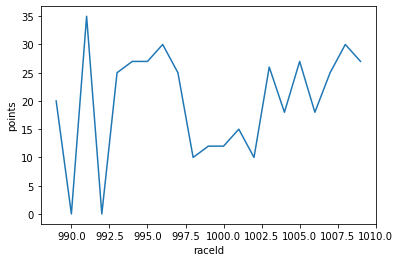

In [86]:
sns.lineplot(x = constructorResults.loc[(constructorResults['constructorId'] == 9) & (constructorResults['raceId'] > 988) & (constructorResults['raceId'] < 1010)]['raceId'], y = constructorResults.loc[(constructorResults['constructorId'] == 9) & (constructorResults['raceId'] > 988) & (constructorResults['raceId'] < 1010)]['points'])

In [89]:
season2018 = constructorStandings.loc[(constructorStandings['raceId'] > 988) & (constructorStandings['raceId'] < 1010)]

In [90]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [96]:
season2018['constructorName'] = season2018['constructorId'].map(dict(constructors[['constructorId', 'name']].values))

<ipython-input-96-a0a044de7b76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season2018['constructorName'] = season2018['constructorId'].map(dict(constructors[['constructorId', 'name']].values))


In [97]:
season2018

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,raceName,constructorName
11896,26933,989,6,40.0,1,1,1,Australian Grand Prix,Ferrari
11897,26934,989,131,22.0,2,2,0,Australian Grand Prix,Mercedes
11898,26935,989,9,20.0,3,3,0,Australian Grand Prix,Red Bull
11899,26936,989,1,12.0,4,4,0,Australian Grand Prix,McLaren
11900,26937,989,4,7.0,5,5,0,Australian Grand Prix,Renault
...,...,...,...,...,...,...,...,...,...
12101,27178,1009,10,52.0,7,7,0,Abu Dhabi Grand Prix,Force India
12102,27179,1009,15,48.0,8,8,0,Abu Dhabi Grand Prix,Sauber
12103,27180,1009,3,7.0,10,10,0,Abu Dhabi Grand Prix,Williams
12104,27181,1009,5,33.0,9,9,0,Abu Dhabi Grand Prix,Toro Rosso


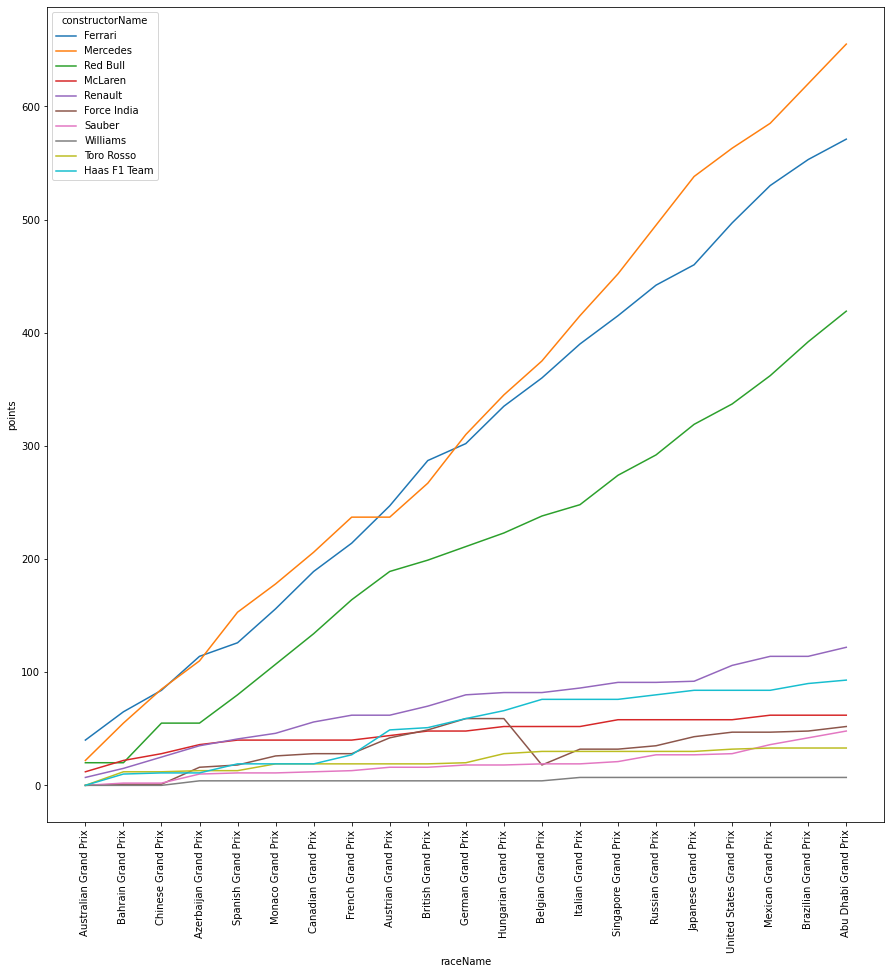

In [102]:
plt.figure(figsize = (15,15))
sns.lineplot(data = season2018, x = 'raceName', y = 'points', hue = 'constructorName')
plt.xticks(rotation = 90)
plt.show()

### Historical performance of different drivers in the Azerbaijan Grand Prix

In [107]:
races.loc[races['name'] == 'Azerbaijan Grand Prix']

,raceId,year,round,circuitId,name,date,time,url
963,976,2017,8,73,Azerbaijan Grand Prix,2017-06-25,13:00:00,https://en.wikipedia.org/wiki/2017_Azerbaijan_...
979,992,2018,4,73,Azerbaijan Grand Prix,2018-04-29,12:10:00,https://en.wikipedia.org/wiki/2018_Azerbaijan_...
1000,1013,2019,4,73,Azerbaijan Grand Prix,2019-04-28,12:10:00,https://en.wikipedia.org/wiki/2019_Azerbaijan_...
1041,1057,2021,6,73,Azerbaijan Grand Prix,2021-06-06,12:00:00,http://en.wikipedia.org/wiki/2021_Azerbaijan_G...


In [204]:
azerbaijan = results.loc[(results['raceId'] == 976) | (results['raceId'] == 992) | (results['raceId'] == 1013) | (results['raceId'] == 1057)]

In [205]:
azerbaijan['driverName'] = azerbaijan['driverId'].map(dict(drivers[['driverId', 'code']]))

<ipython-input-205-d685b350b522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  azerbaijan['driverName'] = azerbaijan['driverId'].map(dict(drivers[['driverId', 'code']]))


In [123]:
azerbaijan['driverId'].map(dict(drivers[['driverId', 'code']]))

23514    NaN
23515    NaN
23516    NaN
23517    NaN
23518    NaN
        ... 
25075    NaN
25076    NaN
25077    NaN
25078    NaN
25079    NaN
Name: driverId, Length: 80, dtype: object

In [125]:
drivers[['driverId', 'code']]

,driverId,code
0,1,HAM
1,2,HEI
2,3,ROS
3,4,ALO
4,5,KOV
...,...,...
848,850,FIT
849,851,AIT
850,852,TSU
851,853,MAZ


In [134]:
azerbaijan['driverId'].map(dict(drivers[['driverId', 'number']]))

23514    NaN
23515    NaN
23516    NaN
23517    NaN
23518    NaN
        ... 
25075    NaN
25076    NaN
25077    NaN
25078    NaN
25079    NaN
Name: driverId, Length: 80, dtype: object

In [149]:
races

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1053,1069,2021,18,69,United States Grand Prix,2021-10-24,19:00:00,http://en.wikipedia.org/wiki/2021_United_State...
1054,1070,2021,19,32,Mexico City Grand Prix,2021-10-31,19:00:00,http://en.wikipedia.org/wiki/2021_Mexican_Gran...
1055,1071,2021,20,18,Brazilian Grand Prix,2021-11-07,17:00:00,http://en.wikipedia.org/wiki/2021_Brazilian_Gr...
1056,1072,2021,22,77,Saudi Arabian Grand Prix,2021-12-05,16:00:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...


In [206]:
azerbaijan = azerbaijan.merge(drivers[['driverId', 'code']], left_on='driverId', right_on='driverId', how = 'inner')
azerbaijan = azerbaijan.merge(races[['raceId', 'year']], left_on = 'raceId', right_on = 'raceId', how = 'inner')
azerbaijan = azerbaijan.loc[azerbaijan['rank'] < 11]
azerbaijan = azerbaijan.drop(azerbaijan.loc[azerbaijan['rank'] == 0].index)

Text(0, 0.5, 'Driver')

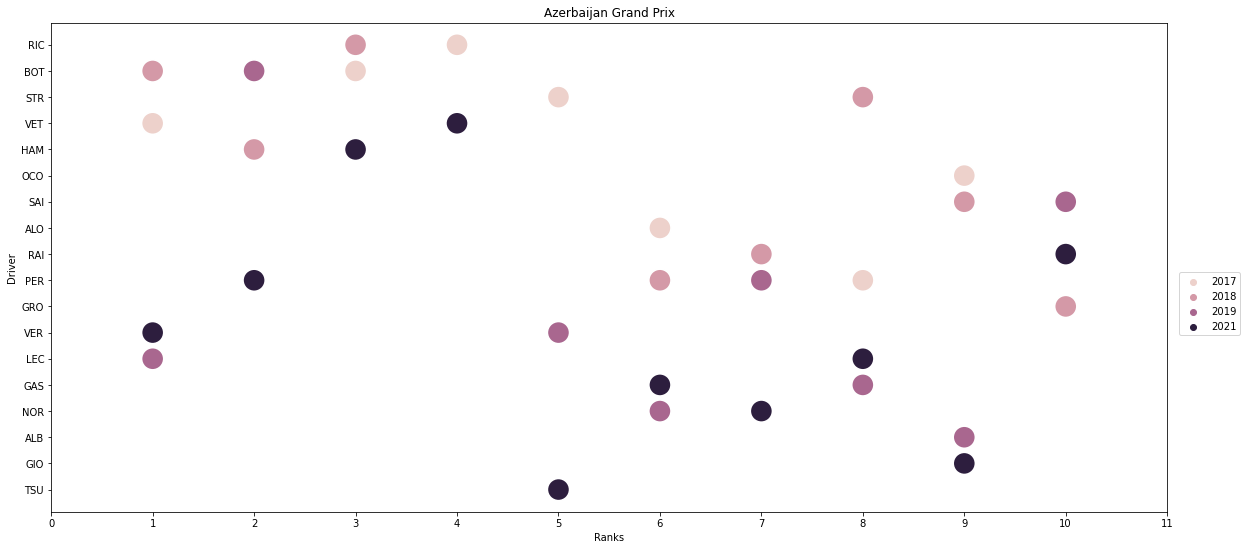

In [226]:
plt.figure(figsize = (20,9))
p1 = sns.scatterplot(data = azerbaijan, x = 'rank', y = 'code', hue = 'year', s = 500)
plt.legend(loc= 'upper right', bbox_to_anchor=(1.07,0.5))

x = np.arange(0, 12, 1)
plt.margins(x=0)
plt.xticks(x)
plt.title('Azerbaijan Grand Prix')
# Set x-axis label
plt.xlabel('Ranks')
# Set y-axis label
plt.ylabel('Driver')

In [229]:
azerbaijan['code'].value_counts()

VET    4
PER    4
HAM    4
RAI    3
SAI    3
VER    3
BOT    3
RIC    2
GAS    2
STR    2
NOR    2
LEC    2
ALO    1
ALB    1
OCO    1
GIO    1
TSU    1
GRO    1
Name: code, dtype: int64

In [240]:
ham

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,raceName
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Australian Grand Prix
26,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1,Malaysian Grand Prix
56,57,20,1,1,22,3,13,13,13,0.0,56,\N,\N,25,19,1:35.520,203.969,11,Bahrain Grand Prix
68,69,21,1,1,22,5,3,3,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1,Spanish Grand Prix
89,90,22,1,1,22,3,2,2,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1,Turkish Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25046,25052,1056,1,131,44,7,7,7,7,7.0,78,+1:08.231,6005051,69,1,1:12.909,164.769,1,Monaco Grand Prix
25074,25080,1057,1,131,44,2,15,15,15,0.0,51,+17.668,8034078,43,3,1:44.769,206.270,1,Azerbaijan Grand Prix
25081,25087,1059,1,131,44,2,2,2,2,18.0,53,+2.904,5248674,44,5,1:37.410,215.903,1,French Grand Prix
25101,25107,1058,1,131,44,2,2,2,2,19.0,71,+35.743,4974668,71,1,1:07.058,231.811,1,Styrian Grand Prix


<AxesSubplot:xlabel='constructorId', ylabel='rank'>

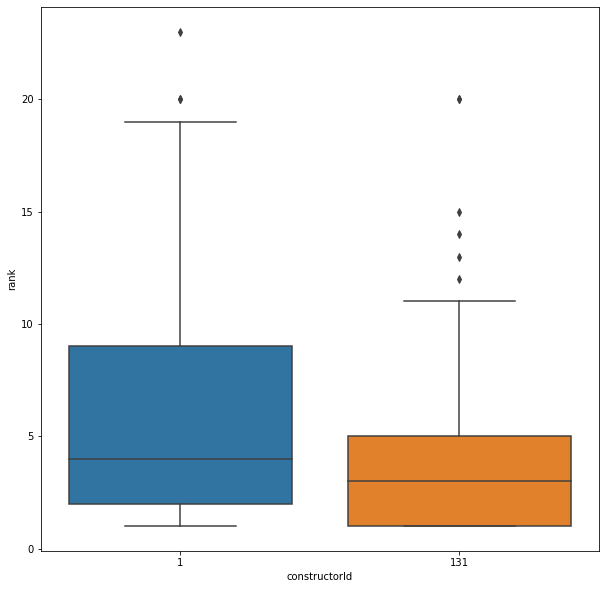

In [250]:
plt.figure(figsize = (10,10))
sns.boxplot(y = ham['rank'], x = ham['constructorId'])

<AxesSubplot:xlabel='rank', ylabel='count'>

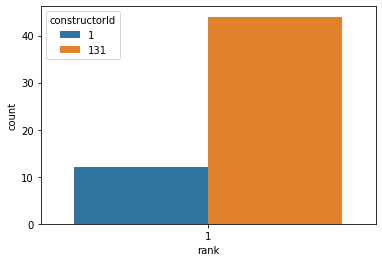

In [255]:
sns.countplot(hue = ham.loc[ham['rank'] == 1]['constructorId'], x = ham.loc[ham['rank'] == 1]['rank'])

In [257]:
results.loc[(results['constructorId'] == 131) & (results['rank'] == 1)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,raceName
21402,21405,867,3,131,8,6,6,6,6,8.0,57,+21.176,6277825,54,1,1:42.163,190.953,1,European Grand Prix
21451,21454,869,30,131,7,3,7,7,7,6.0,67,+28.970,5494832,57,1,1:18.725,209.163,1,German Grand Prix
21523,21526,872,3,131,8,6,7,7,7,6.0,53,+33.550,4814771,53,1,1:27.239,239.053,1,Italian Grand Prix
21959,21962,892,1,131,10,12,9,9,9,2.0,53,+33.527,4746879,51,1,1:25.849,242.924,1,Italian Grand Prix
22127,22130,900,3,131,6,3,1,1,1,25.0,57,1:32:58.710,5578710,19,1,1:32.478,206.436,1,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24962,24968,1052,822,131,77,3,3,3,3,16.0,56,+37.383,5561280,56,1,1:32.090,211.566,1,Bahrain Grand Prix
24981,24987,1053,1,131,44,1,2,2,2,19.0,63,+22.000,7376598,60,1,1:16.702,230.403,1,Emilia Romagna Grand Prix
25002,25008,1054,822,131,77,1,3,3,3,16.0,66,+33.530,5704951,65,1,1:19.865,209.738,1,Portuguese Grand Prix
25046,25052,1056,1,131,44,7,7,7,7,7.0,78,+1:08.231,6005051,69,1,1:12.909,164.769,1,Monaco Grand Prix


<AxesSubplot:xlabel='rank', ylabel='count'>

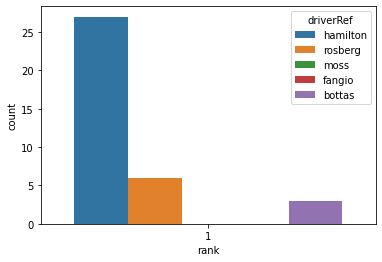

In [298]:
sns.countplot(x = results.loc[(results['constructorId'] == 131) & (results['rank'] == 1) & (results['positionOrder'] == 1)]['rank'], hue = results.loc[(results['constructorId'] == 131) & (results['positionOrder'] == 1) & (results['positionOrder'] == 1)]['driverRef'])

In [303]:
results.loc[(results['constructorId'] == 131) & (results['positionOrder'] == 1) & (results['positionOrder'] == 1)].value_counts('driverRef')

driverRef
hamilton    77
rosberg     23
bottas       9
fangio       8
moss         1
dtype: int64

In [284]:
results.loc[results['code'] == '\\N']

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,raceName,code
5419,1526,90,43,7,16,13,12,12,12,0.0,56,\N,\N,41,15,1:27.820,217.385,12,Australian Grand Prix,\N
5420,1543,91,43,7,16,10,9,9,9,0.0,55,\N,\N,22,12,1:36.544,206.691,11,Malaysian Grand Prix,\N
5421,1564,92,43,7,16,9,10,10,10,0.0,56,\N,\N,23,11,1:32.319,211.237,11,Bahrain Grand Prix,\N
5422,1592,93,43,7,16,10,\N,R,18,0.0,32,\N,\N,25,15,1:23.108,213.683,3,San Marino Grand Prix,\N
5423,1607,94,43,7,16,11,13,13,13,0.0,65,\N,\N,29,14,1:19.112,210.552,11,Spanish Grand Prix,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22455,20177,833,788,105,10,20,10,10,10,0.0,64,\N,\N,\N,20,\N,\N,16,British Grand Prix,\N
22456,20180,835,803,161,24,17,\N,R,27,0.0,108,\N,\N,\N,20,\N,\N,51,Indianapolis 500,\N
22457,20204,809,804,113,23,14,17,17,17,0.0,176,\N,\N,\N,20,\N,\N,117,Indianapolis 500,\N
22458,20236,800,805,139,65,29,\N,R,30,0.0,104,\N,\N,\N,20,\N,\N,48,Indianapolis 500,\N


In [294]:
results = results.merge(drivers[['driverId', 'driverRef']] , left_on='driverId', right_on='driverId', how = 'inner')

In [299]:
drivers.loc[drivers['driverRef'] == 'moss']

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
475,475,moss,\N,\N,Stirling,Moss,1929-09-17,British,http://en.wikipedia.org/wiki/Stirling_Moss


In [304]:
results.loc[(results['constructorId'] == 131) & (results['driverRef'] == 'moss')]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,raceName,driverRef
20568,19069,792,475,131,6,8,\N,R,13,0.0,29,\N,\N,\N,20,\N,\N,69,Argentine Grand Prix,moss
20569,19086,793,475,131,16,3,9,9,9,0.0,81,\N,\N,\N,20,\N,\N,124,Monaco Grand Prix,moss
20570,19135,795,475,131,14,3,2,2,2,6.0,36,+8.1,9577100,\N,20,\N,\N,1,Belgian Grand Prix,moss
20571,19151,796,475,131,10,2,2,2,2,6.0,100,+0.3,10464100,\N,20,\N,\N,1,Dutch Grand Prix,moss
20572,19166,797,475,131,12,1,1,1,1,9.0,90,3:07:21.2,11241200,\N,20,\N,\N,1,British Grand Prix,moss
20573,19204,798,475,131,16,2,\N,R,14,1.0,27,\N,\N,\N,20,\N,\N,5,Italian Grand Prix,moss
20590,20249,792,475,131,8,10,4,4,4,1.0,94,\N,\N,\N,20,\N,\N,12,Argentine Grand Prix,moss


In [317]:
results.loc[(results['driverId'] == 1) & (results['positionOrder'] == 1)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,raceName,driverRef
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Australian Grand Prix,hamilton
5,109,23,1,1,22,3,1,1,1,10.0,76,2:00:42.742,7242742,71,6,1:18.510,153.152,1,Monaco Grand Prix,hamilton
8,169,26,1,1,22,4,1,1,1,10.0,60,1:39:09.440,5949440,16,3,1:32.817,199.398,1,British Grand Prix,hamilton
9,189,27,1,1,22,1,1,1,1,10.0,67,1:31:20.874,5480874,17,2,1:16.039,216.552,1,German Grand Prix,hamilton
16,329,34,1,1,22,1,1,1,1,10.0,56,1:31:57.403,5517403,13,1,1:36.325,203.722,1,Chinese Grand Prix,hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,24886,1044,1,131,44,6,1,1,1,25.0,58,1:42:19.313,6139313,56,6,1:39.413,193.302,1,Turkish Grand Prix,hamilton
264,24906,1045,1,131,44,1,1,1,1,25.0,57,2:59:47.515,10787515,38,3,1:32.864,209.803,1,Bahrain Grand Prix,hamilton
266,24966,1052,1,131,44,2,1,1,1,25.0,56,1:32:03.897,5523897,44,4,1:34.015,207.235,1,Bahrain Grand Prix,hamilton
268,25006,1054,1,131,44,2,1,1,1,25.0,66,1:34:31.421,5671421,47,4,1:20.933,206.971,1,Portuguese Grand Prix,hamilton


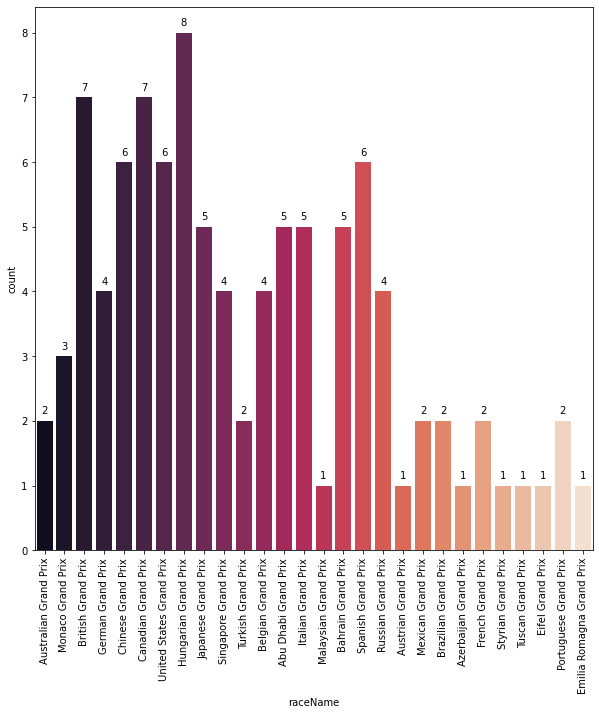

In [334]:
plt.figure(figsize = (10,10))
splot = sns.countplot(x = results.loc[(results['driverId'] == 1) & (results['positionOrder'] == 1)]['raceName'], palette='rocket')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation = 90)
plt.show()

In [353]:
results.loc[results['positionOrder'] == 1].value_counts('Constructor Name')

Constructor Name
Ferrari            239
McLaren            178
Mercedes           118
Williams           114
Red Bull            70
Team Lotus          45
Renault             35
Benetton            27
Tyrrell             23
Brabham             23
Lotus-Climax        22
BRM                 17
Cooper-Climax       12
Lotus-Ford          11
Alfa Romeo          11
Vanwall             10
Matra-Ford           9
Maserati             9
Ligier               9
Brawn                8
Brabham-Repco        8
Kurtis Kraft         5
McLaren-Ford         4
Jordan               4
Honda                3
Wolf                 3
March                3
Watson               3
Lotus F1             2
Brabham-Ford         2
Epperly              2
Cooper-Maserati      2
Cooper               2
Brabham-Climax       2
AlphaTauri           1
BMW Sauber           1
Toro Rosso           1
Stewart              1
Kuzma                1
Shadow               1
Lotus-BRM            1
Porsche              1
Eagle-Weslake    

In [348]:
results = results.merge(constructors[['constructorId', 'name']], right_on = 'constructorId', left_on = 'constructorId', how = 'inner')

In [352]:
results.rename(columns={'name' : 'Constructor Name'}, inplace=True)

<AxesSubplot:xlabel='count', ylabel='Constructor Name'>

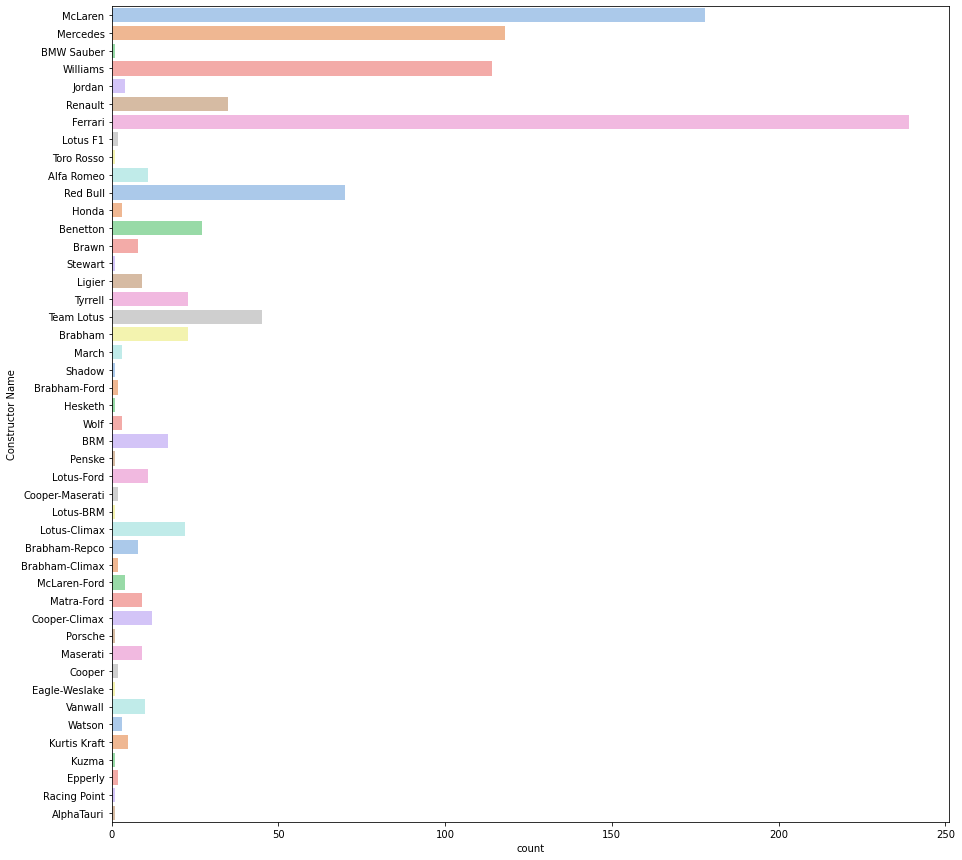

In [361]:
plt.figure(figsize = (15,15))
sns.countplot(y = results.loc[results['positionOrder'] == 1]['Constructor Name'], palette = 'pastel')

<AxesSubplot:xlabel='count', ylabel='grid'>

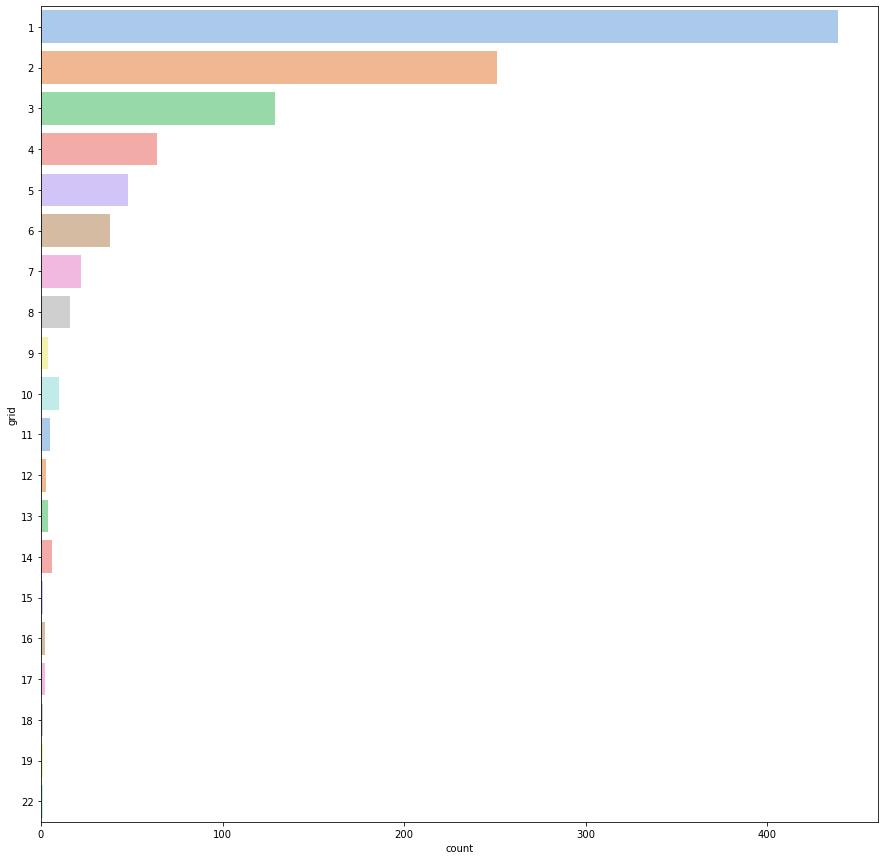

In [365]:
plt.figure(figsize = (15,15))
sns.countplot(y = results.loc[results['positionOrder'] == 1]['grid'], palette = 'pastel')

In [392]:
pitStops['time'] = pd.to_datetime(pitStops['time'], format = '%H:%M:%S')

In [399]:
pitStops['milliseconds'].min()

12897

In [400]:
pitStops.loc[pitStops['milliseconds'] == 12897]

,raceId,driverId,stop,lap,time,duration,milliseconds,Hour of the Day
1037,858,813,2,30,1900-01-01 17:58:49,12.897,12897,17


In [402]:
results[(results['raceId'] == 858) & (results['driverId'] == 813)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,raceName,driverRef,Constructor Name
3652,21197,858,813,3,12,23,14,14,14,0.0,...,\N,\N,52,13,1:44.628,191.099,11,Abu Dhabi Grand Prix,maldonado,Williams


In [403]:
races.loc[races['raceId'] == 858]

,raceId,year,round,circuitId,name,date,time,url
856,858,2011,18,24,Abu Dhabi Grand Prix,2011-11-13,13:00:00,http://en.wikipedia.org/wiki/2011_Abu_Dhabi_Gr...


In [409]:
drivers.loc[drivers['code'] == 'VER']

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
817,818,vergne,25,VER,Jean-Éric,Vergne,1990-04-25,French,http://en.wikipedia.org/wiki/Jean-%C3%89ric_Ve...
829,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen


In [425]:
pitStops.loc[pitStops['raceId'] == 1028]['stop'].mode()

0    1
dtype: int64

In [426]:
pitStops

,raceId,driverId,stop,lap,time,duration,milliseconds,Hour of the Day
0,841,153,1,1,1900-01-01 17:05:23,26.898,26898,17
1,841,30,1,1,1900-01-01 17:05:52,25.021,25021,17
2,841,17,1,11,1900-01-01 17:20:48,23.426,23426,17
3,841,4,1,12,1900-01-01 17:22:34,23.251,23251,17
4,841,13,1,13,1900-01-01 17:24:10,23.842,23842,17
...,...,...,...,...,...,...,...,...
8369,1060,832,1,48,1900-01-01 16:01:07,21.431,21431,16
8370,1060,20,2,49,1900-01-01 16:02:39,20.841,20841,16
8371,1060,852,2,51,1900-01-01 16:04:57,26.604,26604,16
8372,1060,1,2,53,1900-01-01 16:06:32,21.421,21421,16


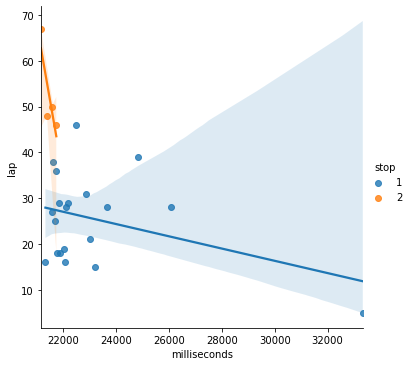

In [503]:
sns.lmplot(x = 'milliseconds', y = 'lap', data = pitStops.loc[pitStops['raceId'] == 1021], hue = 'stop')

In [433]:
pitStops.loc[pitStops['raceId'] == 1028]

,raceId,driverId,stop,lap,time,duration,milliseconds,Hour of the Day
7333,1028,848,1,1,1900-01-01 13:15:12,34.100,34100,13
7334,1028,840,1,9,1900-01-01 13:29:09,24.567,24567,13
7335,1028,9,1,11,1900-01-01 13:32:54,24.164,24164,13
7336,1028,830,1,13,1900-01-01 13:35:21,23.716,23716,13
7337,1028,822,1,14,1900-01-01 13:36:58,24.151,24151,13
7338,1028,841,1,17,1900-01-01 13:43:05,25.230,25230,13
7339,1028,832,1,18,1900-01-01 13:44:27,24.784,24784,13
7340,1028,8,1,18,1900-01-01 13:44:29,24.544,24544,13
7341,1028,825,1,18,1900-01-01 13:44:43,24.929,24929,13
7342,1028,846,1,19,1900-01-01 13:46:03,24.678,24678,13


In [449]:
pitStops.loc[(pitStops['raceId'] > 1017) & (pitStops['raceId'] < 1035) & (pitStops['driverId'] == 1) | (pitStops['driverId'] == 822)]

,raceId,driverId,stop,lap,time,duration,milliseconds,Hour of the Day
2064,880,822,1,6,1900-01-01 17:13:14,23.528,23528,17
2091,880,822,2,24,1900-01-01 17:42:08,23.215,23215,17
2107,880,822,3,40,1900-01-01 18:07:27,24.060,24060,18
2122,881,822,1,6,1900-01-01 16:16:09,24.960,24960,16
2151,881,822,2,22,1900-01-01 16:44:54,28.045,28045,16
...,...,...,...,...,...,...,...,...
8279,1057,822,2,47,1900-01-01 17:34:08,21.346,21346,17
8296,1057,822,3,48,1900-01-01 17:37:13,33:55.229,2035229,17
8305,1059,822,1,17,1900-01-01 15:31:34,30.572,30572,15
8332,1058,822,1,27,1900-01-01 15:34:56,21.752,21752,15


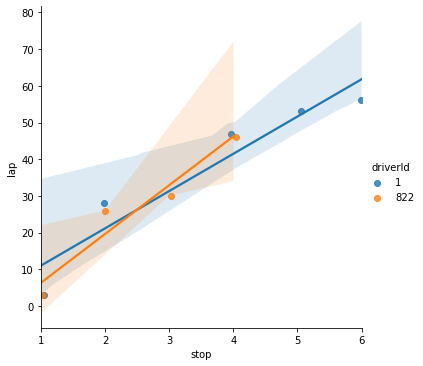

In [485]:
sns.lmplot(data = pitStops.loc[(pitStops['raceId'] == 1020) & ((pitStops['driverId'] == 1) | (pitStops['driverId'] == 822))], x = 'stop', y = 'lap', hue = 'driverId', x_jitter = 0.05)

In [473]:
pitStops.loc[pitStops['raceId'] == 1018]

,raceId,driverId,stop,lap,time,duration,milliseconds,Hour of the Day
7017,1018,825,1,11,1900-01-01 15:26:15,23.243,23243,15
7018,1018,825,2,13,1900-01-01 15:29:01,16.224,16224,15
7019,1018,9,1,19,1900-01-01 15:36:00,21.525,21525,15
7020,1018,822,1,21,1900-01-01 15:37:18,22.552,22552,15
7021,1018,20,1,21,1900-01-01 15:37:22,25.236,25236,15
7022,1018,844,1,22,1900-01-01 15:38:23,21.878,21878,15
7023,1018,8,1,23,1900-01-01 15:40:05,21.709,21709,15
7024,1018,841,1,24,1900-01-01 15:41:20,21.672,21672,15
7025,1018,846,1,25,1900-01-01 15:42:23,21.547,21547,15
7026,1018,842,1,25,1900-01-01 15:42:27,22.239,22239,15


In [505]:
races.loc[races['year'] == 2020]

,raceId,year,round,circuitId,name,date,time,url
1018,1031,2020,1,70,Austrian Grand Prix,2020-07-05,13:10:00,https://en.wikipedia.org/wiki/2020_Austrian_Gr...
1019,1032,2020,2,70,Styrian Grand Prix,2020-07-12,13:10:00,https://en.wikipedia.org/wiki/2020_Styrian_Gra...
1020,1033,2020,3,11,Hungarian Grand Prix,2020-07-19,13:10:00,https://en.wikipedia.org/wiki/2020_Hungarian_G...
1021,1034,2020,4,9,British Grand Prix,2020-08-02,13:10:00,https://en.wikipedia.org/wiki/2020_British_Gra...
1022,1035,2020,5,9,70th Anniversary Grand Prix,2020-08-09,13:10:00,https://en.wikipedia.org/wiki/70th_Anniversary...
1023,1036,2020,6,4,Spanish Grand Prix,2020-08-16,13:10:00,https://en.wikipedia.org/wiki/2020_Spanish_Gra...
1024,1037,2020,7,13,Belgian Grand Prix,2020-08-30,13:10:00,https://en.wikipedia.org/wiki/2020_Belgian_Gra...
1025,1038,2020,8,14,Italian Grand Prix,2020-09-06,13:10:00,https://en.wikipedia.org/wiki/2020_Italian_Gra...
1026,1039,2020,9,76,Tuscan Grand Prix,2020-09-13,13:10:00,https://en.wikipedia.org/wiki/2020_Tuscan_Gran...
1027,1040,2020,10,71,Russian Grand Prix,2020-09-27,11:10:00,https://en.wikipedia.org/wiki/2020_Russian_Gra...


In [507]:
results.loc[(results['raceId'] > 1030) & (results['raceId'] < 1048)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,raceName,driverRef,Constructor Name
1655,24630,1031,832,1,55,8,5,5,5,10.0,...,+8.903,5464642,63,5,1:07.974,228.687,1,Austrian Grand Prix,sainz,McLaren
1656,24654,1032,832,1,55,3,9,9,9,3.0,...,\N,\N,68,1,1:05.619,236.894,11,Styrian Grand Prix,sainz,McLaren
1657,24674,1033,832,1,55,9,9,9,9,2.0,...,\N,\N,68,15,1:20.477,195.976,11,Hungarian Grand Prix,sainz,McLaren
1658,24698,1034,832,1,55,7,13,13,13,0.0,...,+53.370,5334653,47,10,1:29.948,235.776,1,British Grand Prix,sainz,McLaren
1659,24718,1035,832,1,55,12,13,13,13,0.0,...,+1:14.070,4856063,49,9,1:30.556,234.193,1,70th Anniversary Grand Prix,sainz,McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25039,24885,1043,842,213,10,4,\N,R,20,0.0,...,\N,\N,5,20,1:20.403,219.797,34,Emilia Romagna Grand Prix,gasly,AlphaTauri
25040,24898,1044,842,213,10,19,13,13,13,0.0,...,\N,\N,53,7,1:39.586,192.966,11,Turkish Grand Prix,gasly,AlphaTauri
25041,24911,1045,842,213,10,8,6,6,6,8.0,...,+11.942,10799457,48,16,1:34.817,205.482,1,Bahrain Grand Prix,gasly,AlphaTauri
25042,24936,1046,842,213,10,9,11,11,11,0.0,...,+20.527,5495641,53,10,0:57.220,222.908,1,Sakhir Grand Prix,gasly,AlphaTauri


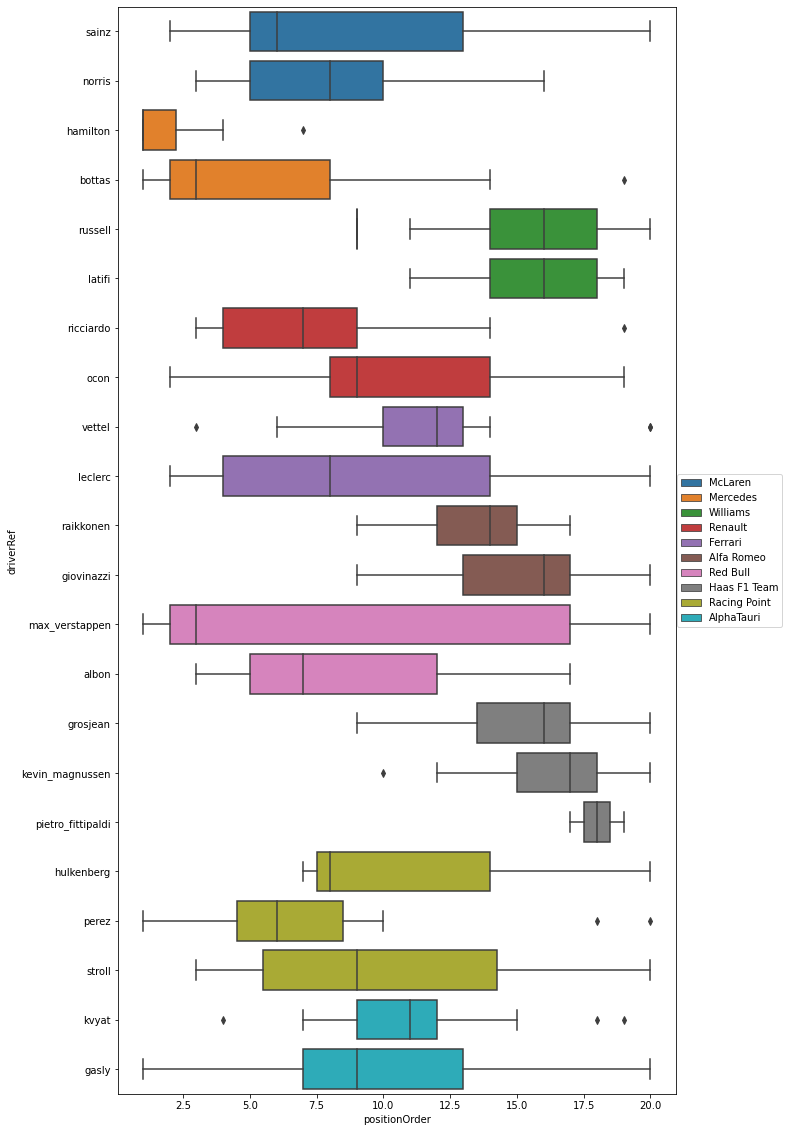

In [536]:
plt.figure(figsize = (10,20))
sns.boxplot(data = results.loc[(results['raceId'] > 1030) & (results['raceId'] < 1048)].drop(results.loc[results['driverRef'] == 'aitken'].index), y = 'driverRef', x = 'positionOrder', hue = 'Constructor Name', dodge = False)
plt.legend(loc = 'right', bbox_to_anchor = (1.2,0.5))

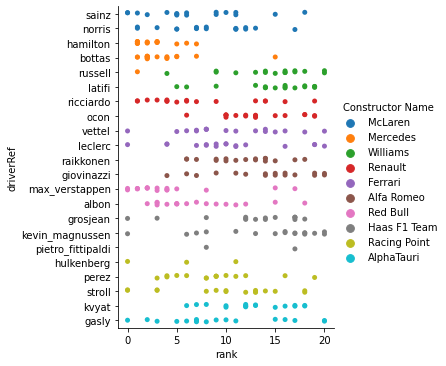

In [538]:
sns.catplot(data = results.loc[(results['raceId'] > 1030) & (results['raceId'] < 1048)].drop(results.loc[results['driverRef'] == 'aitken'].index), x = 'rank', y = 'driverRef', hue='Constructor Name')

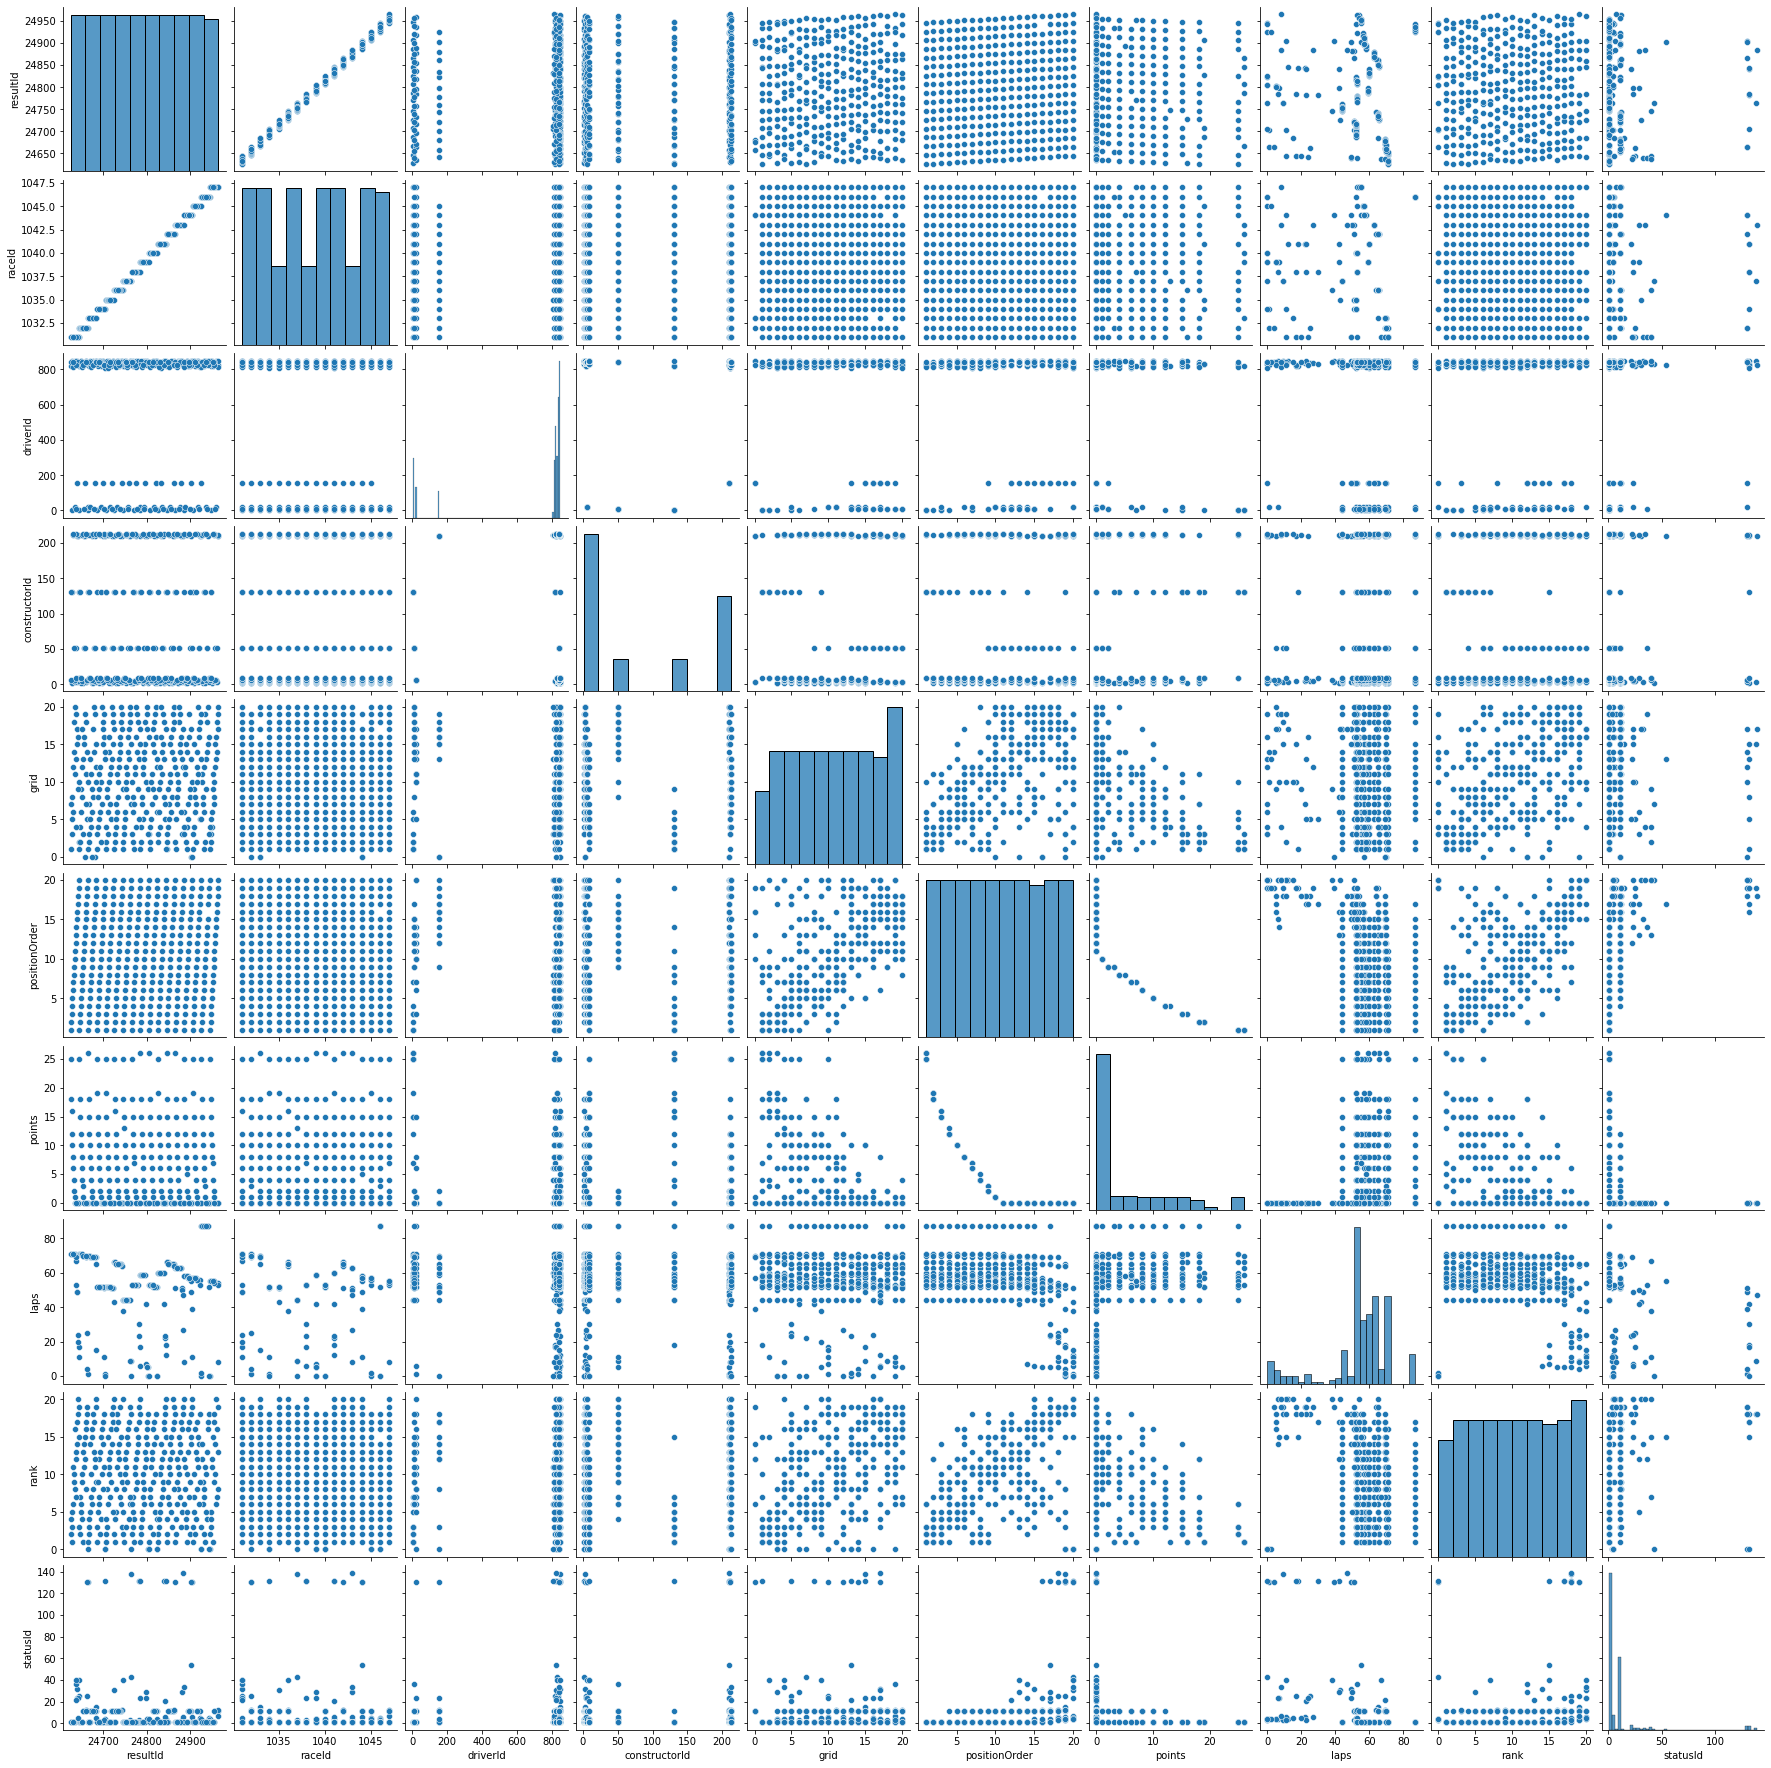

In [546]:
sns.pairplot(data = results.loc[(results['raceId'] > 1030) & (results['raceId'] < 1048)].drop(results.loc[results['driverRef'] == 'aitken'].index))

<Figure size 1080x7920 with 0 Axes>

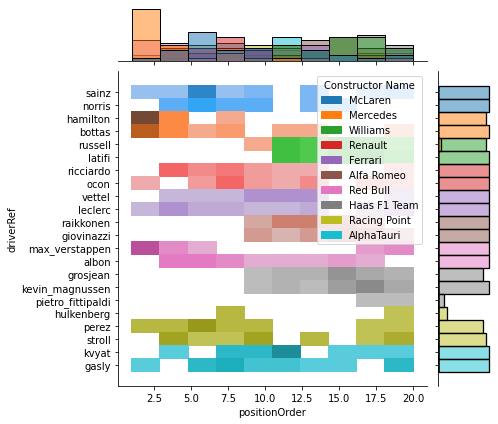

In [580]:
plt.figure(figsize=(15,110))
sns.jointplot(data = results.loc[(results['raceId'] > 1030) & (results['raceId'] < 1048)].drop(results.loc[results
['driverRef'] == 'aitken'].index), y = 'driverRef', x = 'positionOrder', kind = 'hist', hue='Constructor Name')
#, bbox_to_anchor = (1,1))

<Figure size 1080x1080 with 0 Axes>

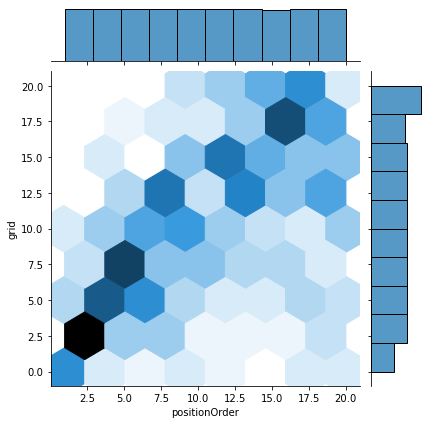

In [579]:
plt.figure(figsize=(15,15))
sns.jointplot(data = results.loc[(results['raceId'] > 1030) & (results['raceId'] < 1048)].drop(results.loc[results['driverRef'] == 'aitken'].index), y = 'grid', x = 'positionOrder', kind = 'hex', palette
              = 'inferno_r')

<AxesSubplot:xlabel='positionOrder', ylabel='driverRef'>

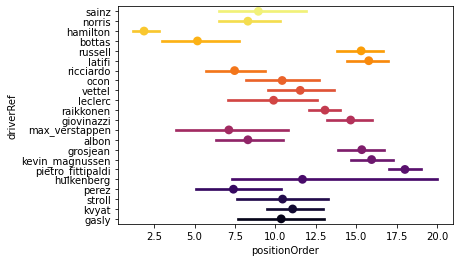

In [585]:
sns.pointplot(data = results.loc[(results['raceId'] > 1030) & (results['raceId'] < 1048)].drop(results.loc[results
['driverRef'] == 'aitken'].index), x = 'positionOrder', y = 'driverRef', palette = 'inferno_r')

<AxesSubplot:xlabel='positionOrder', ylabel='grid'>

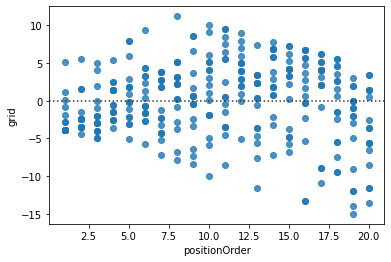

In [591]:
sns.residplot(data = results.loc[(results['raceId'] > 1030) & (results['raceId'] < 1048)].drop(results.loc[results
['driverRef'] == 'aitken'].index), x = 'positionOrder', y = 'grid')